In [ ]:
from google.colab import files
data_to_load=files.upload()


Saving Car_Sale.csv to Car_Sale.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Car_Sale.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,0.6,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,1.4,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,6.0,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,2.5,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,4.5,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4340 non-null   float64
 3   km_driven      4340 non-null   int64  
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.050945,66215.777419
std,4.215344,5.783689,46644.102194
min,1992.000000,0.200000,1.000000
25%,2011.000000,2.075000,35000.000000
50%,2014.000000,3.500000,60000.000000
75%,2016.000000,6.000000,90000.000000
max,2020.000000,89.000000,806599.000000


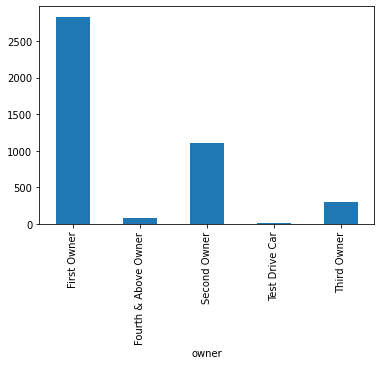

In [ ]:
df.groupby(by=['owner']).size().plot(kind="bar")

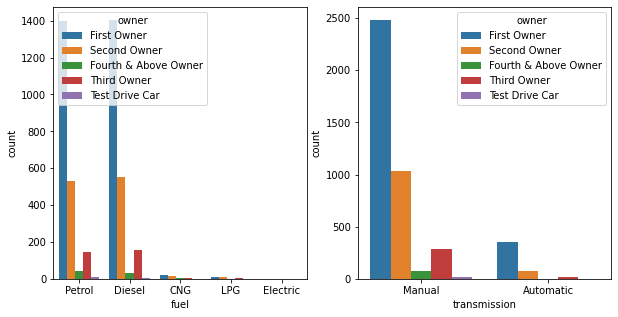

In [ ]:
fig,ax=plt.subplots(1,2,figsize = (10,5))
sns.countplot(x = "fuel",hue='owner',data = df ,ax=ax[0])

sns.countplot(x = "transmission",hue='owner',data = df ,ax=ax[1])

In [ ]:
df["Current_Year"] =2020
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year
0,Maruti 800 AC,2007,0.6,70000,Petrol,Individual,Manual,First Owner,2020
1,Maruti Wagon R LXI Minor,2007,1.4,50000,Petrol,Individual,Manual,First Owner,2020
2,Hyundai Verna 1.6 SX,2012,6.0,100000,Diesel,Individual,Manual,First Owner,2020
3,Datsun RediGO T Option,2017,2.5,46000,Petrol,Individual,Manual,First Owner,2020
4,Honda Amaze VX i-DTEC,2014,4.5,141000,Diesel,Individual,Manual,Second Owner,2020


In [ ]:
df["No_of_Years_Old"] = df["Current_Year"] - df["year"]
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year,No_of_Years_Old
0,Maruti 800 AC,2007,0.6,70000,Petrol,Individual,Manual,First Owner,2020,13
1,Maruti Wagon R LXI Minor,2007,1.4,50000,Petrol,Individual,Manual,First Owner,2020,13
2,Hyundai Verna 1.6 SX,2012,6.0,100000,Diesel,Individual,Manual,First Owner,2020,8
3,Datsun RediGO T Option,2017,2.5,46000,Petrol,Individual,Manual,First Owner,2020,3
4,Honda Amaze VX i-DTEC,2014,4.5,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [ ]:
df.drop(["year",'name','Current_Year'],axis =1,inplace=True)

In [ ]:
df.head(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,No_of_Years_Old
0,0.6,70000,Petrol,Individual,Manual,First Owner,13
1,1.4,50000,Petrol,Individual,Manual,First Owner,13
2,6.0,100000,Diesel,Individual,Manual,First Owner,8
3,2.5,46000,Petrol,Individual,Manual,First Owner,3
4,4.5,141000,Diesel,Individual,Manual,Second Owner,6


In [ ]:
df['owner'] = df['owner'].replace(['First Owner'],0)
df['owner'] = df['owner'].replace(['Second Owner'],1)
df['owner'] = df['owner'].replace(['Third Owner'],2)
df['owner'] = df['owner'].replace(['Fourth & Above Owner'],3)
df['owner'] = df['owner'].replace(['Test Drive Car'],4)

In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,No_of_Years_Old
0,0.6,70000,Petrol,Individual,Manual,0,13
1,1.4,50000,Petrol,Individual,Manual,0,13
2,6.0,100000,Diesel,Individual,Manual,0,8
3,2.5,46000,Petrol,Individual,Manual,0,3
4,4.5,141000,Diesel,Individual,Manual,1,6


In [ ]:
final_df = pd.get_dummies(df,drop_first=True)
final_df

,selling_price,km_driven,owner,No_of_Years_Old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.6,70000,0,13,0,0,0,1,1,0,1
1,1.4,50000,0,13,0,0,0,1,1,0,1
2,6.0,100000,0,8,1,0,0,0,1,0,1
3,2.5,46000,0,3,0,0,0,1,1,0,1
4,4.5,141000,1,6,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4335,4.1,80000,1,6,1,0,0,0,1,0,1
4336,4.1,80000,1,6,1,0,0,0,1,0,1
4337,1.1,83000,1,11,0,0,0,1,1,0,1
4338,8.7,90000,0,4,1,0,0,0,1,0,1


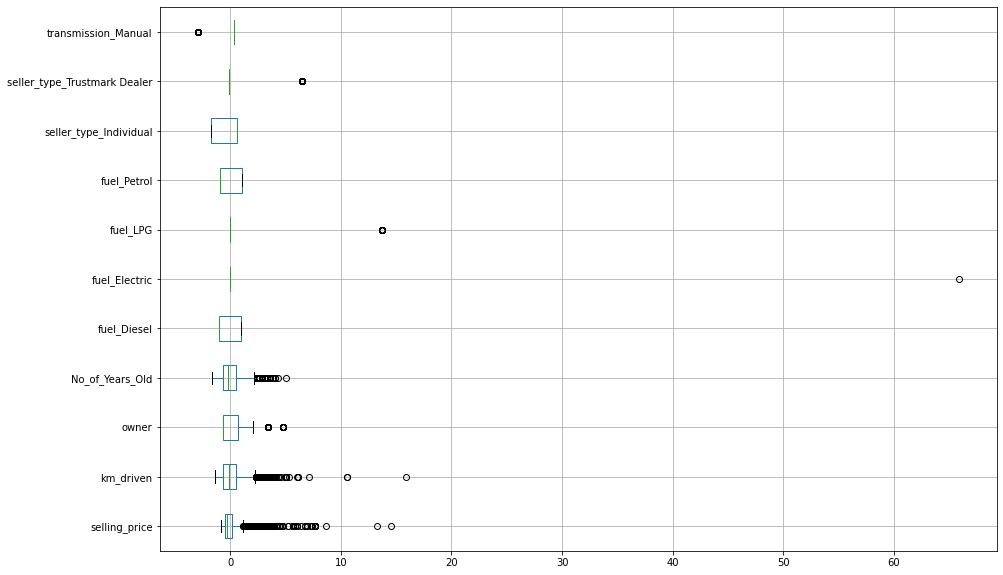

In [ ]:
#outlier Check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(final_df)
z=pd.DataFrame(scaler.transform(final_df),columns=final_df.columns)
z.boxplot(vert=False,figsize=(15,10))

In [ ]:
from sklearn.preprocessing import normalize
nm = normalize(final_df)
cols = final_df.columns
df1 = pd.DataFrame(nm, columns = cols)
X = df1.drop(["selling_price"], axis = 1)
y = df1["selling_price"]

In [ ]:

#X = final_df.drop(["selling_price"], axis = 1)
#y = final_df["selling_price"]

In [ ]:
## Feature importance ( finding important features)
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[8.79934865e-01 6.39574445e-02 3.32839779e-04 1.11792845e-03
 0.00000000e+00 0.00000000e+00 8.58366631e-04 2.44770514e-04
 0.00000000e+00 5.35537852e-02]


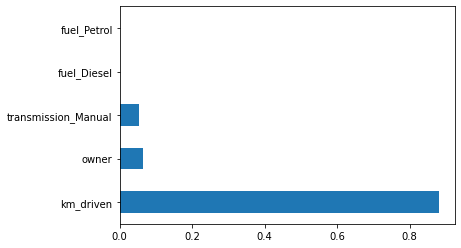

In [ ]:
#plot graph of feature importances for better visualization
#printing top 5 features
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# we can see that most important feature is present_price


In [ ]:
# Regression Modeling
import statsmodels.api as sm
#performing ols. from the ols result 
#we can see that sex has a p-value of 0.694
#almost 7. And we already know any variable that has 
#a p-value which is greater that 0.5 will not be useful for predicting.
#so we would drop sex
x = sm.add_constant(X)


model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 4.704e+04
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        07:06:54   Log-Likelihood:                 26251.
No. Observations:                4340   AIC:                        -5.248e+04
Df Residuals:                    4329   BIC:                        -5.241e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
#X=X.drop(['fuel_Electric','fuel_LPG','fuel_Petrol','fuel_Diesel'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=5) 
print(X_train.shape)
print(y_train.shape)
X_train

(3038, 10)
(3038,)


,km_driven,owner,No_of_Years_Old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
2700,1.000000,0.000000,0.000075,0.000000,0.0,0.0,0.000025,0.000025,0.000000,0.000000
2233,1.000000,0.000000,0.000020,0.000000,0.0,0.0,0.000020,0.000020,0.000000,0.000020
2447,0.999999,0.000000,0.000200,0.000100,0.0,0.0,0.000000,0.000100,0.000000,0.000100
2401,1.000000,0.000004,0.000034,0.000004,0.0,0.0,0.000000,0.000004,0.000000,0.000004
1314,1.000000,0.000043,0.000100,0.000000,0.0,0.0,0.000014,0.000014,0.000000,0.000014
...,...,...,...,...,...,...,...,...,...,...
3046,0.999999,0.000000,0.000100,0.000100,0.0,0.0,0.000000,0.000100,0.000000,0.000000
1725,1.000000,0.000008,0.000075,0.000000,0.0,0.0,0.000008,0.000008,0.000000,0.000008
4079,1.000000,0.000000,0.000200,0.000000,0.0,0.0,0.000200,0.000200,0.000000,0.000200
2254,1.000000,0.000000,0.000065,0.000022,0.0,0.0,0.000000,0.000000,0.000022,0.000022


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=5)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#x_test = scaler.transform(x_test)

In [ ]:
#standardization scaler - fit&transform on train, fit only on test
#from sklearn.preprocessing import StandardScaler
#s_scaler = StandardScaler()
#X_train = s_scaler.fit_transform(X_train)#
#x_test = s_scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-0.48289063283695743
[ 4.82922161e-01 -1.28294554e-01 -5.48049932e-01  1.55839884e+01
 -7.10542736e-15  1.30618102e+01  1.29670605e+01 -1.03459576e+00
  1.19184173e+00 -5.79639557e+00]


In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
#compare actual output values with predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)


,Actual,Predicted
1844,0.000551,0.000352
975,0.000708,0.000316
878,0.000007,0.000036
1623,0.000326,0.000222
1795,0.002129,0.001213
2358,0.001444,0.001058
3442,0.000155,0.000144
1703,0.000186,0.000125
2172,0.000070,0.000130
2687,0.000167,0.000200


MAE: 0.0001346032088887528
MSE: 6.834937357356386e-07
RMSE: 0.0008267367995533032
VarScore: 0.948108860879415
R square error = 0.9481064384673842


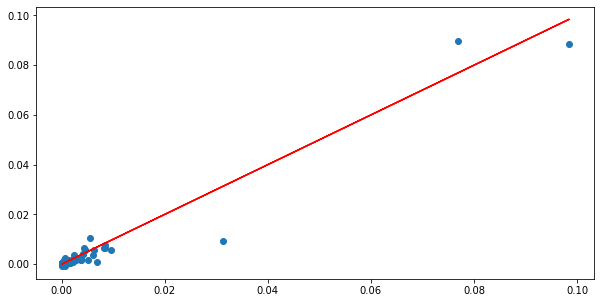

In [ ]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print("R square error =",r2_score(y_test, y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
print(regressor.predict([[70000,0,13,0,0,0,1,1,0,1]]))

[33803.07979769]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import metrics

In [ ]:
model = Sequential()
model.add(Dense(11, input_shape=(10,),kernel_initializer='uniform', activation='relu'))

model.add(Dense(11, kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                121       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train,epochs=1000,batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/1000
98/98 [==============================] - 0s 2ms/step - loss: 5.8488e-05 - val_loss: 7.0918e-06
Epoch 2/1000
98/98 [==============================] - 0s 1ms/step - loss: 5.5931e-05 - val_loss: 7.2623e-06
Epoch 3/1000
98/98 [==============================] - 0s 1ms/step - loss: 4.5963e-05 - val_loss: 6.9028e-06
Epoch 4/1000
98/98 [==============================] - 0s 1ms/step - loss: 4.1565e-05 - val_loss: 1.5479e-05
Epoch 5/1000
98/98 [==============================] - 0s 1ms/step - loss: 3.7406e-05 - val_loss: 6.7493e-06
Epoch 6/1000
98/98 [==============================] - 0s 1ms/step - loss: 3.4122e-05 - val_loss: 7.6621e-06
Epoch 7/1000
98/98 [==============================] - 0s 1ms/step - loss: 2.8682e-05 - val_loss: 6.6405e-06
Epoch 8/1000
98/98 [==============================] - 0s 1ms/step - loss: 2.4825e-05 - val_loss: 8.7892e-06
Epoch 9/1000
98/98 [==============================] - 0s 1ms/step - loss: 2.0650e-05 - val_loss: 6.2341e-06
Epoch 10/1000
98/98 [=======

MAE: 0.000184474191669972
MSE: 1.2068778729240977e-06
RMSE: 0.0010985799346993816
VarScore: 0.909876384337873


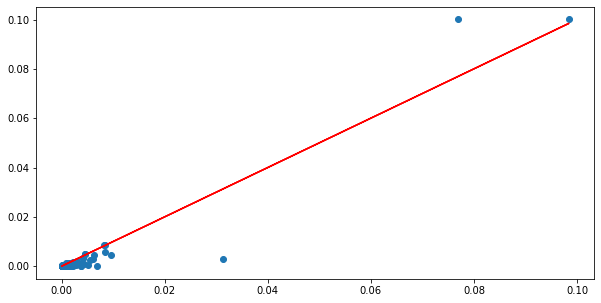

In [ ]:
y_pred = model.predict(x_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
model.save("my_model")
from keras.models import load_model 
model = load_model("my_model") 

NameError: ignored

In [ ]:
input=[[70000,0,13,0,0,0,1,1,0,1]]

In [ ]:
prediction = model.predict(input)
print(prediction)